# Importing Neccessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Loading neccessary databases

In [ ]:
i3=pd.read_csv("intel_i3.csv")
i5=pd.read_csv("intel_i5.csv")
i7=pd.read_csv("intel_i7.csv")
i9=pd.read_csv("intel_i9.csv")
all_core=pd.read_csv("intel_all_core.csv")

# Exploratory Data Analysis on Core i3 Gen-12,13 and 14

## Analysis ratings_score Columns

In [ ]:
i3.head()

country  ratingScore                                  reviewDescription  \
0   India            1  Cpu stock cooler fan got broken with 1 blade i...   
1   India            1  The Processor is Good & Works Fine. But The De...   
2   India            4                                Performance is good   
3   India            5  If you would be building pc just for gaming an...   
4   India            5  This is one of the best cpu in budget if you o...   

                                         reviewTitle        Model Core  
0                                cpu with broken fan  i3 12th Gen   i3  
1                        Good Cpu but awful Delivery  i3 12th Gen   i3  
2                                               Good  i3 12th Gen   i3  
3  This is the best you'll get in this price rang...  i3 12th Gen   i3  
4                                            Awesome  i3 12th Gen   i3

In [ ]:
#Column Names
print(f"Feature names : {i3.columns.values}")

Feature names : ['country' 'ratingScore' 'reviewDescription' 'reviewTitle' 'Model' 'Core']


In [ ]:
#Checking for null values
i3.isnull().sum()

country              0
ratingScore          0
reviewDescription    0
reviewTitle          0
Model                0
Core                 0
dtype: int64

In [ ]:
#Dataset shape
print(f"Dataset shape : {i3.shape}")

Dataset shape : (25, 6)


In [ ]:
#Datatypes of columns
i3.dtypes

country              object
ratingScore           int64
reviewDescription    object
reviewTitle          object
Model                object
Core                 object
dtype: object

In [ ]:
#Number of reviews
len(i3)

25

In [ ]:
#Number of reviews per star
print(f"Rating value count: \n{i3['ratingScore'].value_counts()}")

Rating value count: 
ratingScore
5    20
1     2
3     2
4     1
Name: count, dtype: int64


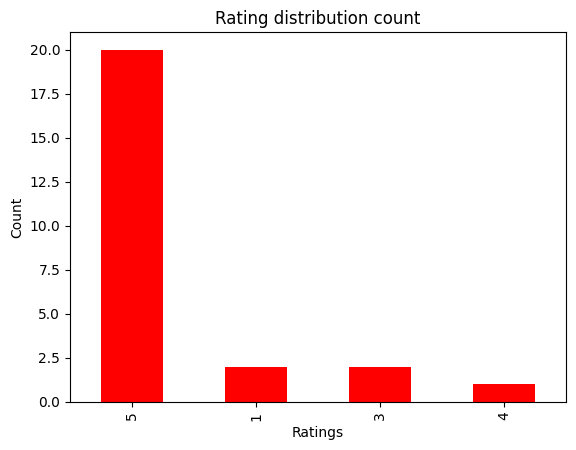

In [ ]:
#Bar plot to visualize the total counts of each rating

i3['ratingScore'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each rating
print(f"Rating value count - percentage distribution: \n{round(i3['ratingScore'].value_counts()/i3.shape[0]*100,2)}")

Rating value count - percentage distribution: 
ratingScore
5    80.0
1     8.0
3     8.0
4     4.0
Name: count, dtype: float64


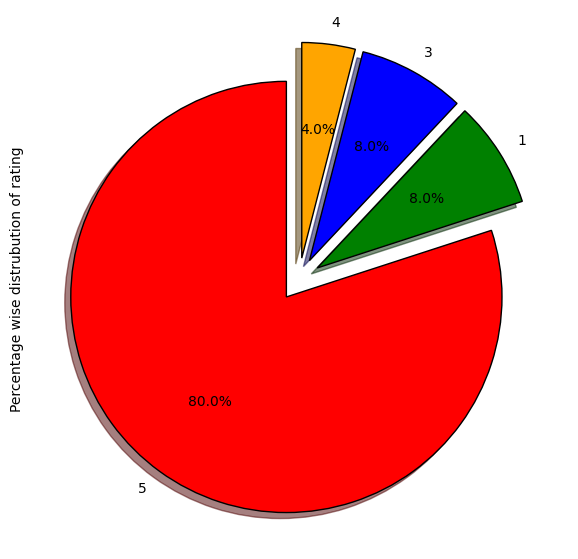

In [ ]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i3['ratingScore'].value_counts()/i3.shape[0]
explode=(0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

## Analysis Model Column

In [ ]:
#Distinct values of 'Model' and its count

print(f"Model value count: \n{i3['Model'].value_counts()}")

Model value count: 
Model
i3 12th Gen    20
i3 14th Gen     4
i3 13th Gen     1
Name: count, dtype: int64


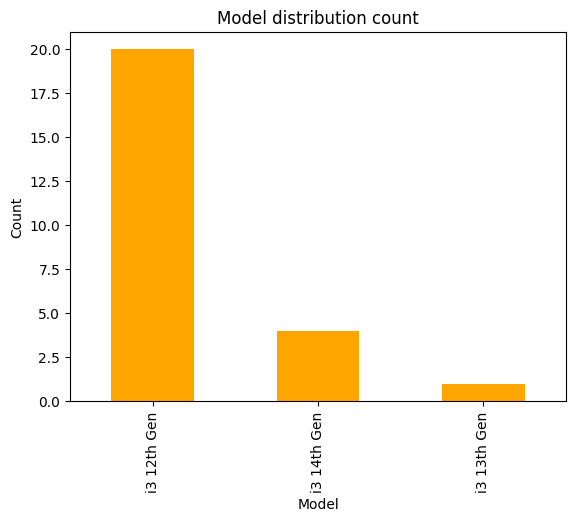

In [ ]:
#Bar graph to visualize the total counts of each Model

i3['Model'].value_counts().plot.bar(color = 'orange')
plt.title('Model distribution count')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each variation

print(f"Variation value count - percentage distribution: \n{round(i3['Model'].value_counts()/i3.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Model
i3 12th Gen    80.0
i3 14th Gen    16.0
i3 13th Gen     4.0
Name: count, dtype: float64


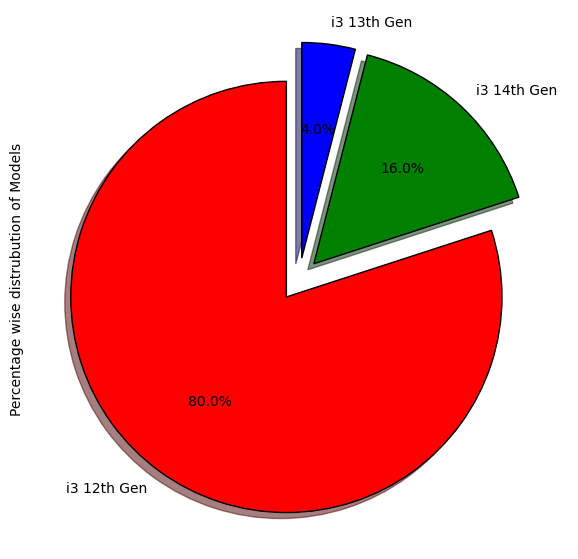

In [ ]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i3['Model'].value_counts()/i3.shape[0]
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Models')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [ ]:
#Mean rating of each model
i3.groupby('Model')['ratingScore'].mean()

Model
i3 12th Gen    4.35
i3 13th Gen    5.00
i3 14th Gen    5.00
Name: ratingScore, dtype: float64

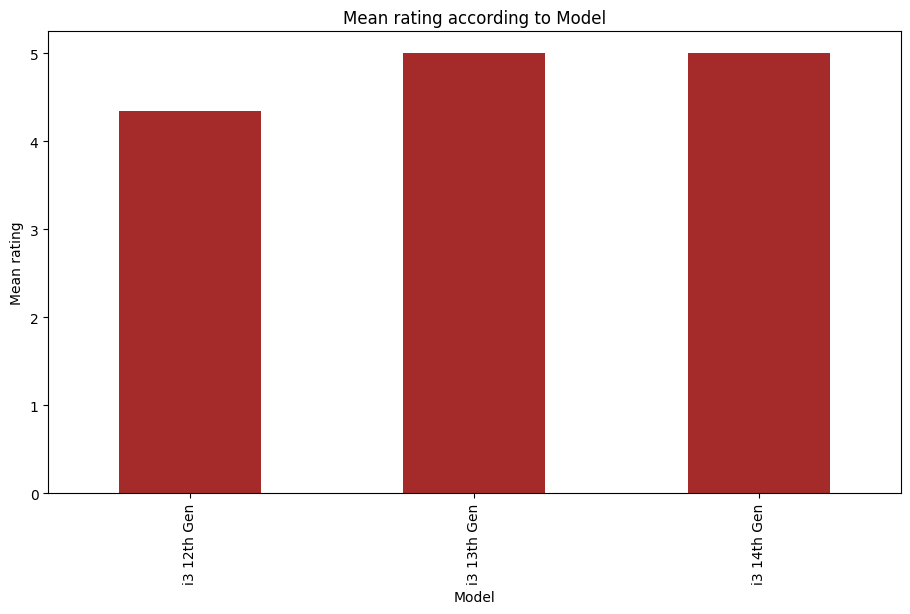

In [ ]:
i3.groupby('Model')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Model')
plt.ylabel('Mean rating')
plt.show()

## Analysing reviewDescription Column

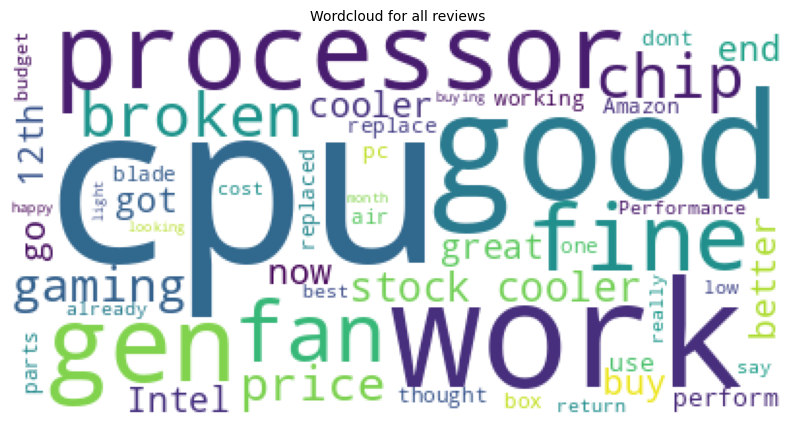

In [ ]:
#Generating World Cloud Of Most Common Words used in reviews
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i3.reviewDescription)
reviews = " ".join([review for review in i3['reviewDescription']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing reviewTitle Column

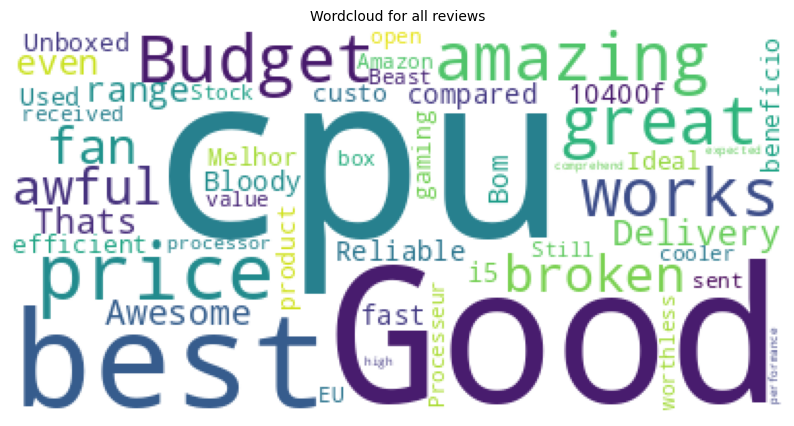

In [ ]:
#Generating World Cloud Of Most Common Words used in reviews titles
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i3.reviewTitle)
reviews = " ".join([review for review in i3['reviewTitle']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing the country Column

In [ ]:
#Number of reviews per country
print(f"Rating value count: \n{i3['country'].value_counts()}")

Rating value count: 
country
India             7
United Kingdom    7
United States     4
Brazil            2
Germany           2
Australia         2
France            1
Name: count, dtype: int64


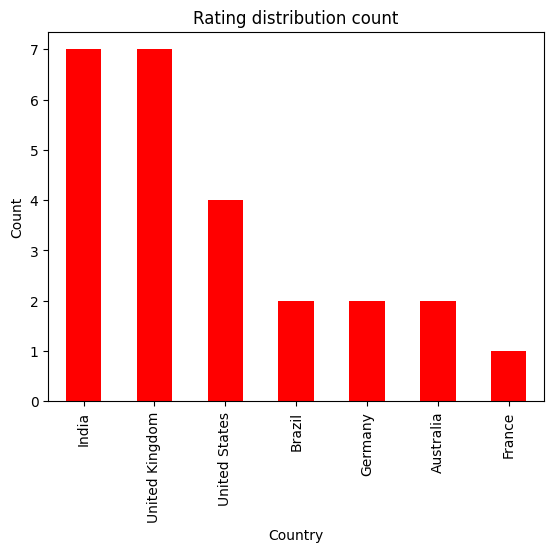

In [ ]:
#Bar plot to visualize the total counts of rating per country

i3['country'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each coutry

print(f"Variation value count - percentage distribution: \n{round(i3['country'].value_counts()/i3.shape[0]*100,2)}")

Variation value count - percentage distribution: 
country
India             28.0
United Kingdom    28.0
United States     16.0
Brazil             8.0
Germany            8.0
Australia          8.0
France             4.0
Name: count, dtype: float64


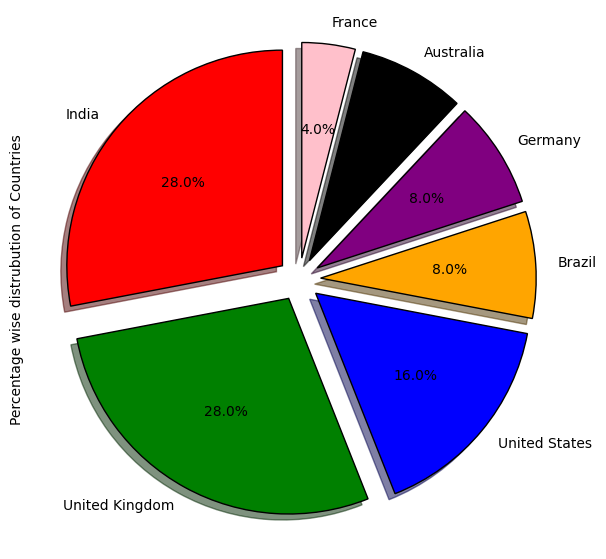

In [ ]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','purple','black','pink')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i3['country'].value_counts()/i3.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Countries')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [ ]:
#Mean rating by each country
i3.groupby('country')['ratingScore'].mean()

country
Australia         5.000000
Brazil            5.000000
France            5.000000
Germany           5.000000
India             3.428571
United Kingdom    4.714286
United States     5.000000
Name: ratingScore, dtype: float64

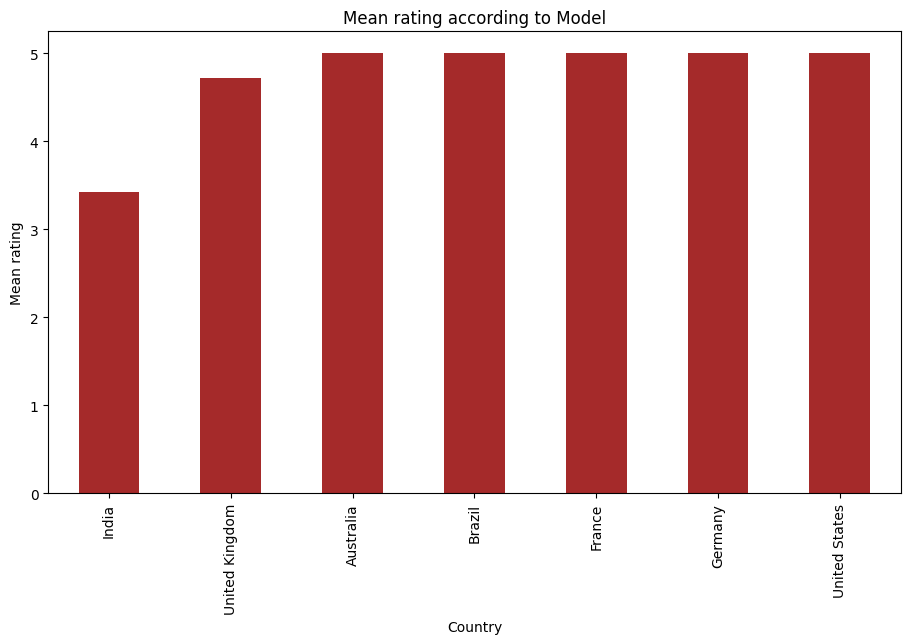

In [ ]:
i3.groupby('country')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Country')
plt.ylabel('Mean rating')
plt.show()

# Exploratory Data Analysis on Core i5 Gen-12,13 and 14

In [ ]:
i5.head()

country  ratingScore  \
0           India            1   
1           India            1   
2           India            1   
3       Australia            1   
4  United Kingdom            1   

                                   reviewDescription  \
0  Fan is not working faulty device.Suggest not t...   
1  I recently purchased an i5 processor from Amaz...   
2  Don’t buy, there’re selling used and defective...   
3  Received this today, cpu was pre used and ratt...   
4  Still waiting for my refund after a faulty mot...   

                                         reviewTitle        Model Core  
0                                     Faulty product  i5 12th Gen   i5  
1  Disappointing Experience with Defective i5 Pro...  i5 12th Gen   i5  
2                           I received used product.  i5 12th Gen   i5  
3                                           Used CPU  i5 12th Gen   i5  
4                                 Waiting for refund  i5 12th Gen   i5

In [ ]:
#Column Names
print(f"Feature names : {i5.columns.values}")

Feature names : ['country' 'ratingScore' 'reviewDescription' 'reviewTitle' 'Model' 'Core']


In [ ]:
#Checking for null values
i5.isnull().sum()

country              0
ratingScore          0
reviewDescription    0
reviewTitle          0
Model                0
Core                 0
dtype: int64

In [ ]:
#Dataset shape
print(f"Dataset shape : {i5.shape}")

Dataset shape : (163, 6)


In [ ]:
#Datatypes of columns
i5.dtypes

country              object
ratingScore           int64
reviewDescription    object
reviewTitle          object
Model                object
Core                 object
dtype: object

In [ ]:
#Number of reviews
len(i5)

163

## Analysis of ratingScore Column

In [ ]:
#Number of reviews per star
print(f"Rating value count: \n{i5['ratingScore'].value_counts()}")

Rating value count: 
ratingScore
5    117
1     19
4     19
3      7
2      1
Name: count, dtype: int64


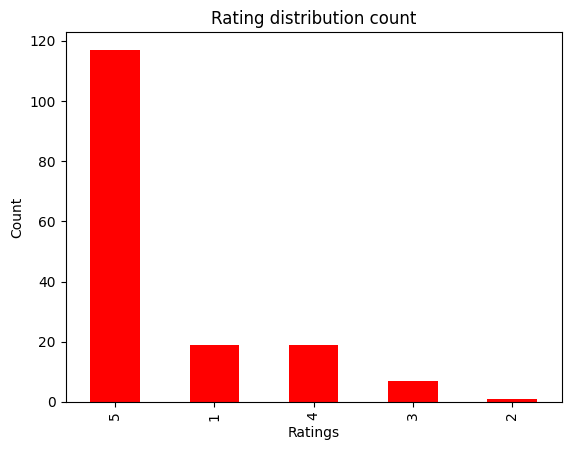

In [ ]:
#Bar plot to visualize the total counts of each rating

i5['ratingScore'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each rating
print(f"Rating value count - percentage distribution: \n{round(i5['ratingScore'].value_counts()/i5.shape[0]*100,2)}")

Rating value count - percentage distribution: 
ratingScore
5    71.78
1    11.66
4    11.66
3     4.29
2     0.61
Name: count, dtype: float64


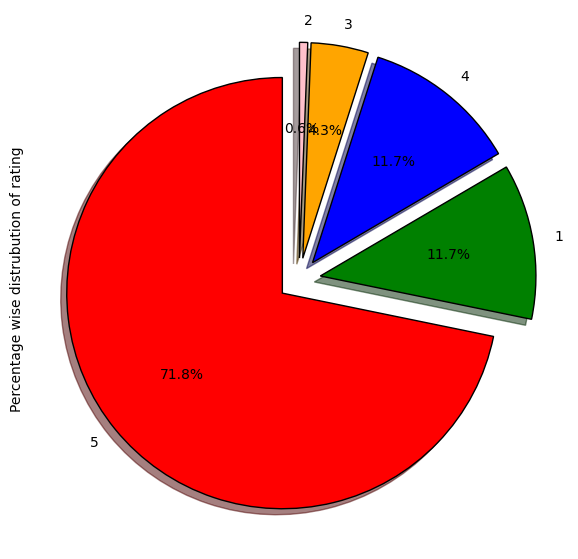

In [ ]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','pink')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i5['ratingScore'].value_counts()/i5.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

## Analysis of Model Column

In [ ]:
#Distinct values of 'Model' and its count

print(f"Model value count: \n{i5['Model'].value_counts()}")

Model value count: 
Model
i5 13th Gen    95
i5 12th Gen    62
i5 14th Gen     6
Name: count, dtype: int64


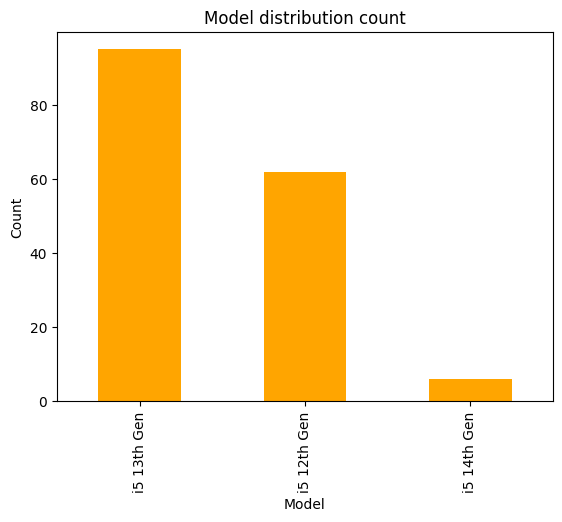

In [ ]:
#Bar graph to visualize the total counts of each Model

i5['Model'].value_counts().plot.bar(color = 'orange')
plt.title('Model distribution count')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each variation

print(f"Variation value count - percentage distribution: \n{round(i5['Model'].value_counts()/i5.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Model
i5 13th Gen    58.28
i5 12th Gen    38.04
i5 14th Gen     3.68
Name: count, dtype: float64


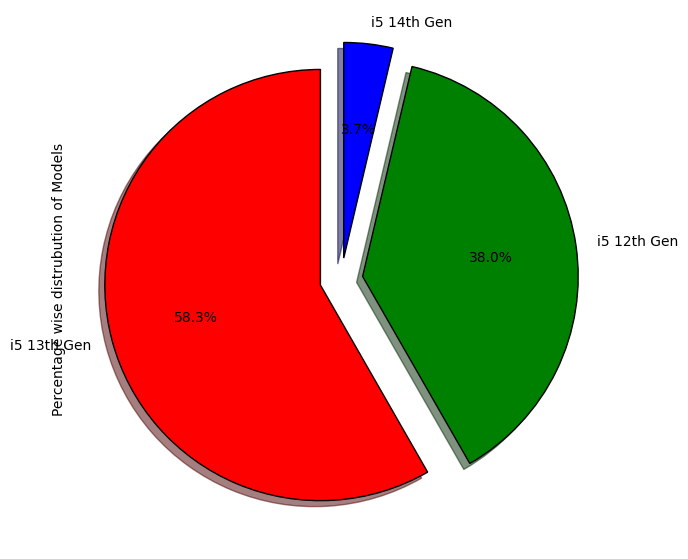

In [ ]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i5['Model'].value_counts()/i5.shape[0]
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Models')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [ ]:
#Mean rating of each model
i5.groupby('Model')['ratingScore'].mean()

Model
i5 12th Gen    3.967742
i5 13th Gen    4.526316
i5 14th Gen    4.500000
Name: ratingScore, dtype: float64

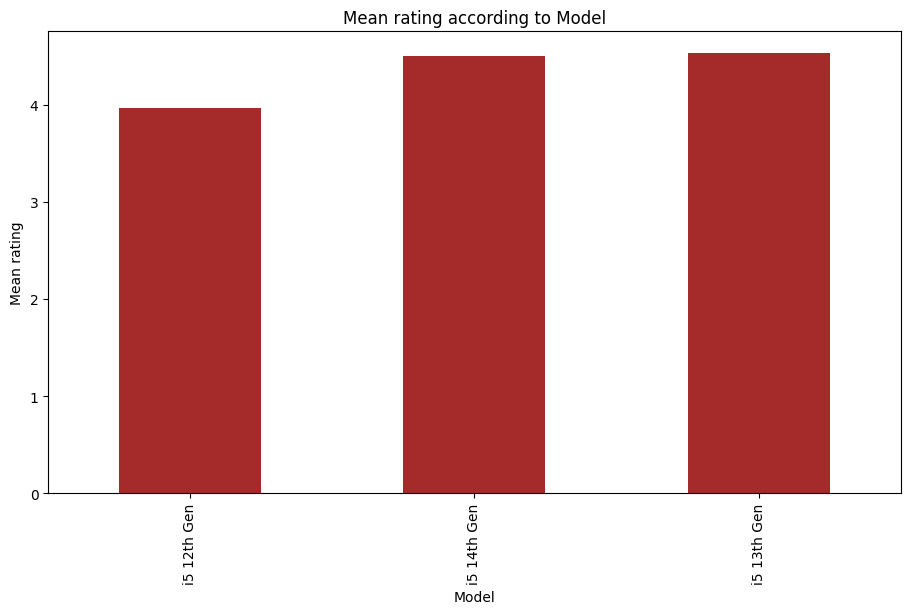

In [ ]:
# Visualising rating distribution per model
i5.groupby('Model')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Model')
plt.ylabel('Mean rating')
plt.show()

## Analysing review_Description Column

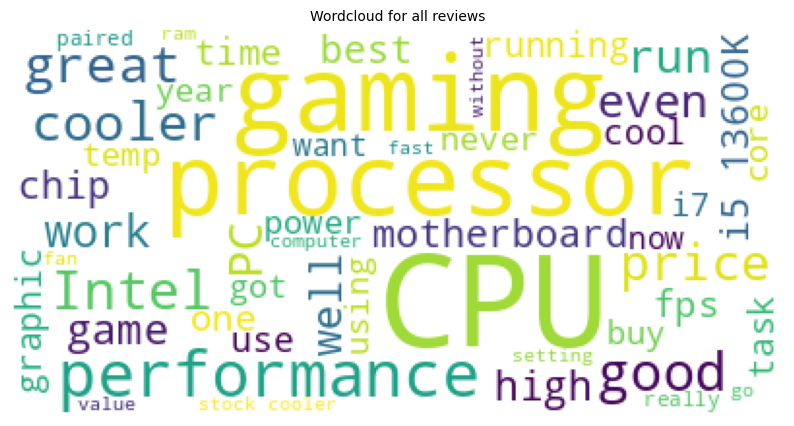

In [ ]:
#Generating World Cloud Of Most Common Words used in reviews
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i5.reviewDescription)
reviews = " ".join([review for review in i5['reviewDescription']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing reviewTitle Column

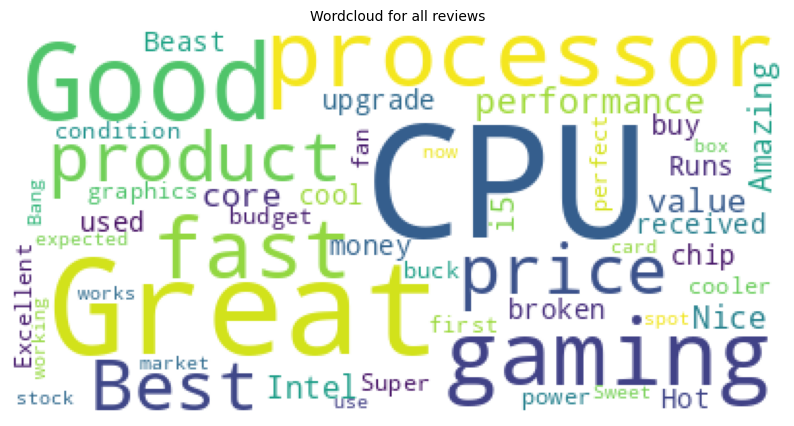

In [ ]:
#Generating World Cloud Of Most Common Words used in reviews titles
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i5.reviewTitle)
reviews = " ".join([review for review in i5['reviewTitle']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing Country Column

In [ ]:
#Number of reviews per country
print(f"Rating value count: \n{i5['country'].value_counts()}")

Rating value count: 
country
United States     83
India             31
United Kingdom    15
Canada            13
Australia          7
Germany            4
Italy              2
France             2
Belgium            1
Spain              1
Sweden             1
Singapore          1
Japan              1
Brazil             1
Name: count, dtype: int64


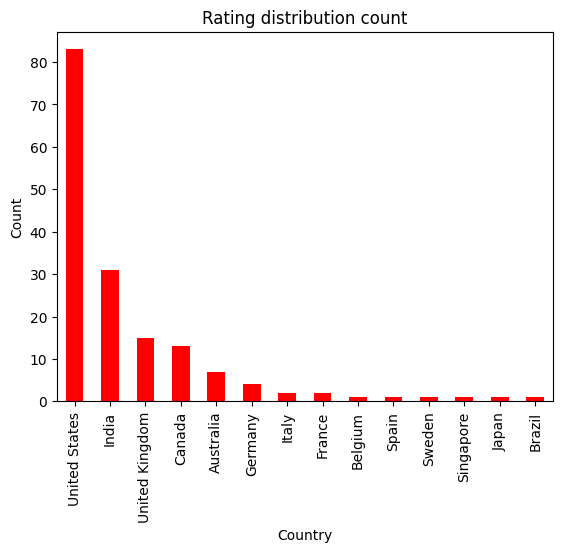

In [ ]:
#Bar plot to visualize the total counts of rating per country

i5['country'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each coutry

print(f"Variation value count - percentage distribution: \n{round(i5['country'].value_counts()/i5.shape[0]*100,2)}")

Variation value count - percentage distribution: 
country
United States     50.92
India             19.02
United Kingdom     9.20
Canada             7.98
Australia          4.29
Germany            2.45
Italy              1.23
France             1.23
Belgium            0.61
Spain              0.61
Sweden             0.61
Singapore          0.61
Japan              0.61
Brazil             0.61
Name: count, dtype: float64


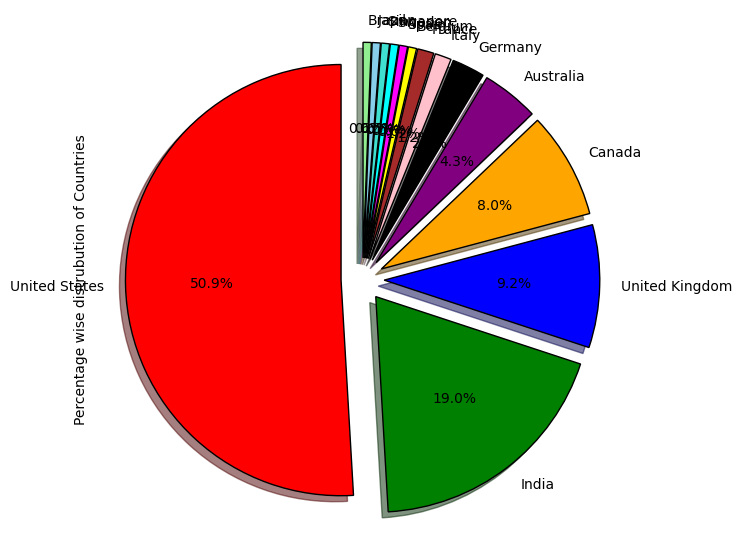

In [ ]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','purple','black','pink','brown','yellow','magenta','cyan','turquoise','skyblue','lightgreen')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i5['country'].value_counts()/i5.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Countries')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [ ]:
#Mean rating by each country
i5.groupby('country')['ratingScore'].mean()

country
Australia         3.428571
Belgium           4.000000
Brazil            5.000000
Canada            4.461538
France            4.500000
Germany           4.500000
India             4.419355
Italy             3.000000
Japan             5.000000
Singapore         5.000000
Spain             4.000000
Sweden            5.000000
United Kingdom    3.266667
United States     4.506024
Name: ratingScore, dtype: float64

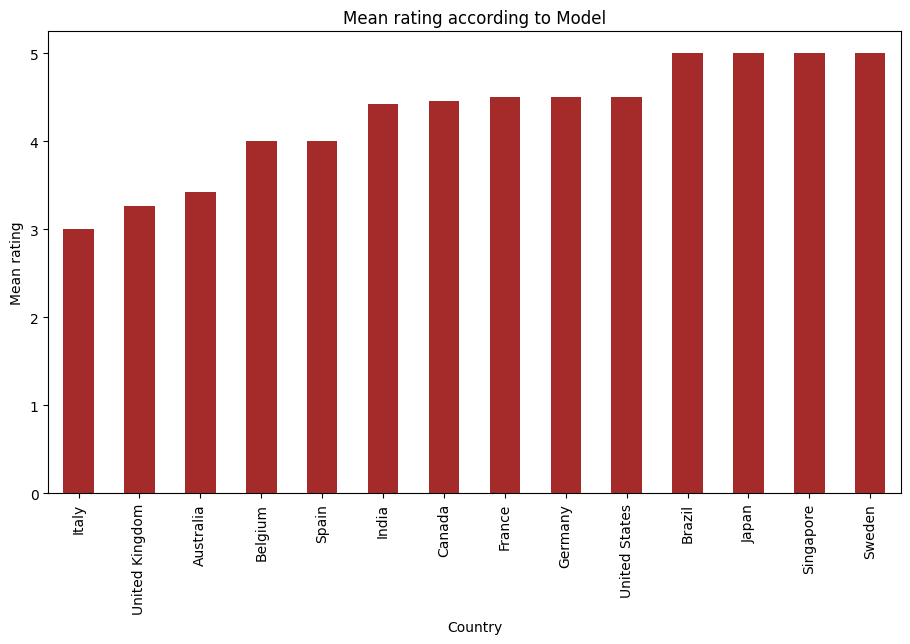

In [ ]:
i5.groupby('country')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Country')
plt.ylabel('Mean rating')
plt.show()

# Exploratory Data Analysis on Core i7 Gen-12,13 and 14

In [ ]:
i7.head()

country  ratingScore  \
0  United Kingdom            3   
1  United Kingdom            4   
2           India            5   
3  United Kingdom            5   
4  United Kingdom            5   

                                   reviewDescription  \
0  Before buying keep in mind that you might need...   
1  Costs a lot and I do not recommend to anyone w...   
2                               Ultimate Performance   
3  Upgraded PC with mother board and graphics car...   
4  Paired this with 32gb corsair dominator DDR5 @...   

                        reviewTitle        Model Core  
0  Good processor with a bad cooler  i7 12th Gen   i7  
1                       Works great  i7 12th Gen   i7  
2                             ....!  i7 12th Gen   i7  
3          Fast enough for my needs  i7 12th Gen   i7  
4                       12700 non k  i7 12th Gen   i7

In [ ]:
#Column Names
print(f"Feature names : {i7.columns.values}")

Feature names : ['country' 'ratingScore' 'reviewDescription' 'reviewTitle' 'Model' 'Core']


In [ ]:
#Checking for null values
i7.isnull().sum()

country              0
ratingScore          0
reviewDescription    0
reviewTitle          0
Model                0
Core                 0
dtype: int64

In [ ]:
#Dataset shape
print(f"Dataset shape : {i7.shape}")

Dataset shape : (136, 6)


In [ ]:
#Datatypes of columns
i7.dtypes

country              object
ratingScore           int64
reviewDescription    object
reviewTitle          object
Model                object
Core                 object
dtype: object

In [ ]:
#Number of reviews
len(i7)

136

## Analysing ratingScore Column

In [ ]:
#Number of reviews per star
print(f"Rating value count: \n{i7['ratingScore'].value_counts()}")

Rating value count: 
ratingScore
5    96
1    18
4    17
3     5
Name: count, dtype: int64


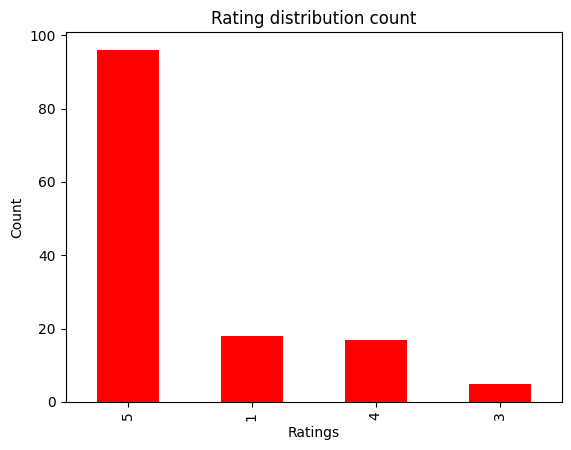

In [ ]:
#Bar plot to visualize the total counts of each rating

i7['ratingScore'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each rating
print(f"Rating value count - percentage distribution: \n{round(i7['ratingScore'].value_counts()/i7.shape[0]*100,2)}")

Rating value count - percentage distribution: 
ratingScore
5    70.59
1    13.24
4    12.50
3     3.68
Name: count, dtype: float64


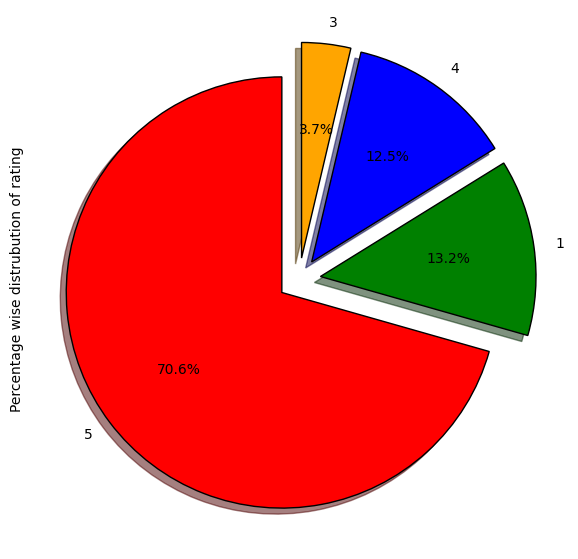

In [ ]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i7['ratingScore'].value_counts()/i7.shape[0]
explode=(0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

## Analysing Model Column

In [ ]:
#Distinct values of 'Model' and its count

print(f"Model value count: \n{i7['Model'].value_counts()}")

Model value count: 
Model
i7 13th Gen    107
i7 14th Gen     22
i7 12th Gen      7
Name: count, dtype: int64


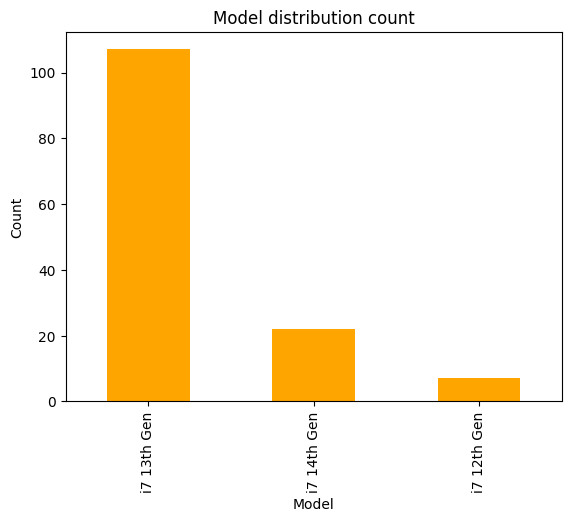

In [ ]:
#Bar graph to visualize the total counts of each Model

i7['Model'].value_counts().plot.bar(color = 'orange')
plt.title('Model distribution count')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each variation

print(f"Variation value count - percentage distribution: \n{round(i7['Model'].value_counts()/i7.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Model
i7 13th Gen    78.68
i7 14th Gen    16.18
i7 12th Gen     5.15
Name: count, dtype: float64


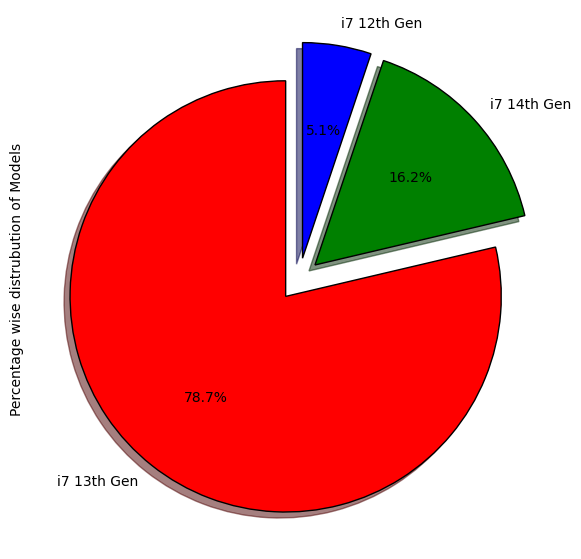

In [ ]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i7['Model'].value_counts()/i7.shape[0]
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Models')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [ ]:
#Mean rating of each model
i7.groupby('Model')['ratingScore'].mean()

Model
i7 12th Gen    4.571429
i7 13th Gen    4.261682
i7 14th Gen    4.227273
Name: ratingScore, dtype: float64

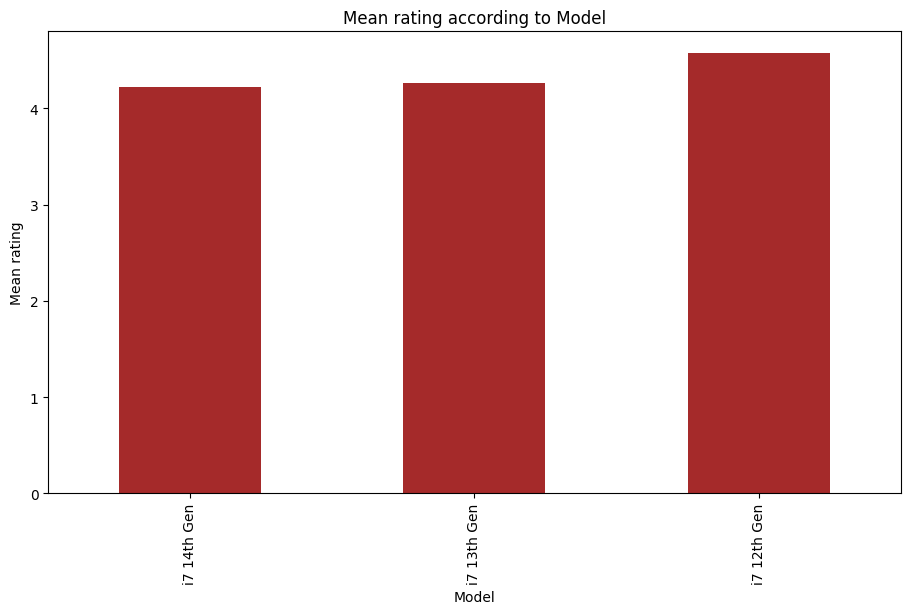

In [ ]:
# Visualising rating distribution per model
i7.groupby('Model')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Model')
plt.ylabel('Mean rating')
plt.show()

## Analysing reviewDescription Column

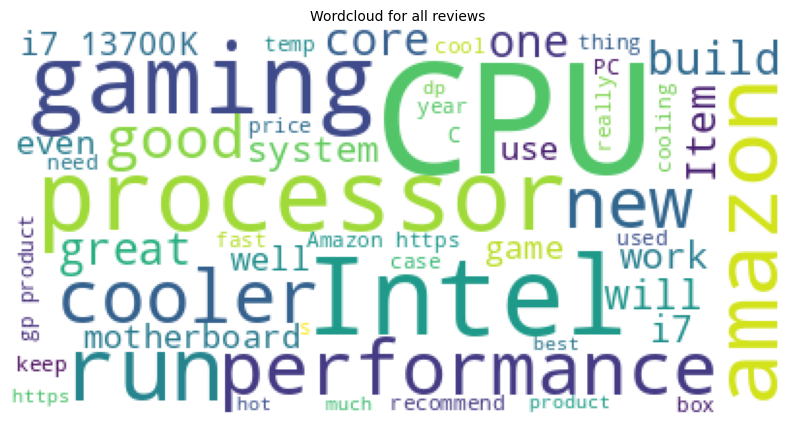

In [ ]:
#Generating World Cloud Of Most Common Words used in reviews
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i7.reviewDescription)
reviews = " ".join([review for review in i7['reviewDescription']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing reviewTitle Column

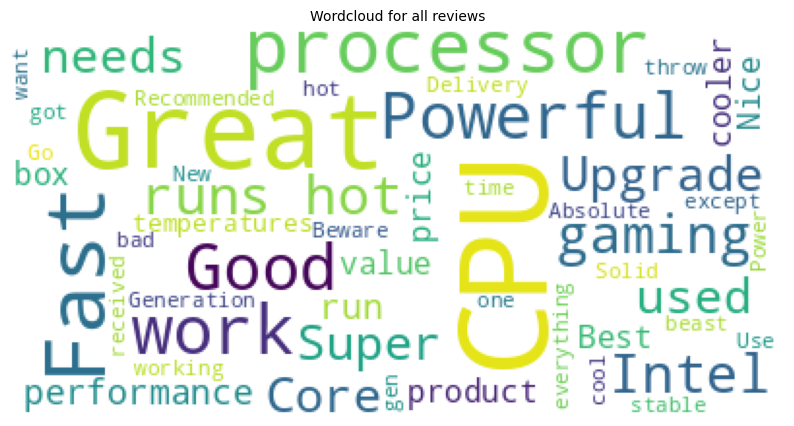

In [ ]:
#Generating World Cloud Of Most Common Words used in reviews titles
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i7.reviewTitle)
reviews = " ".join([review for review in i7['reviewTitle']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing country Column

In [ ]:
#Number of reviews per country
print(f"Rating value count: \n{i7['country'].value_counts()}")

Rating value count: 
country
United States     110
Canada             12
United Kingdom      5
India               4
Germany             2
Spain               1
Mexico              1
Japan               1
Name: count, dtype: int64


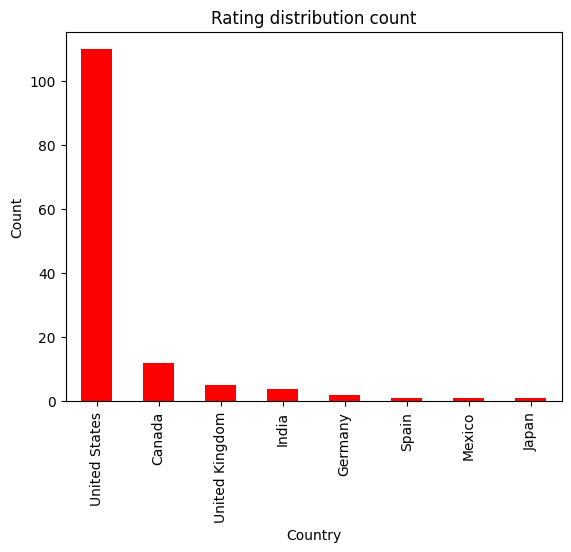

In [ ]:
#Bar plot to visualize the total counts of rating per country

i7['country'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each coutry

print(f"Variation value count - percentage distribution: \n{round(i7['country'].value_counts()/i7.shape[0]*100,2)}")

Variation value count - percentage distribution: 
country
United States     80.88
Canada             8.82
United Kingdom     3.68
India              2.94
Germany            1.47
Spain              0.74
Mexico             0.74
Japan              0.74
Name: count, dtype: float64


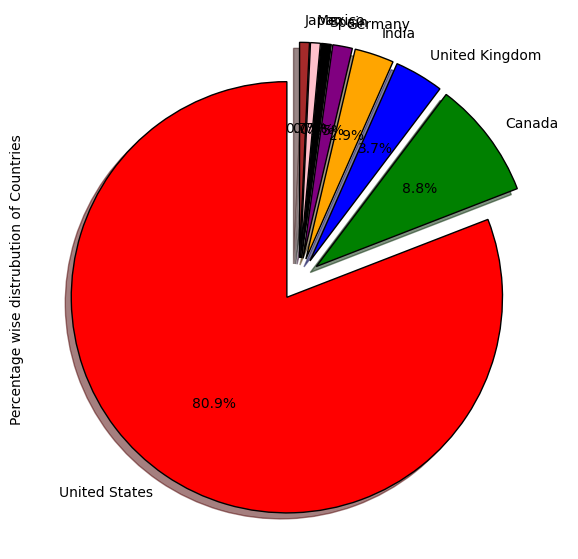

In [ ]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','purple','black','pink','brown')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i7['country'].value_counts()/i7.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Countries')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [ ]:
#Mean rating by each country
i7.groupby('country')['ratingScore'].mean()

country
Canada            4.083333
Germany           5.000000
India             5.000000
Japan             5.000000
Mexico            5.000000
Spain             5.000000
United Kingdom    4.400000
United States     4.227273
Name: ratingScore, dtype: float64

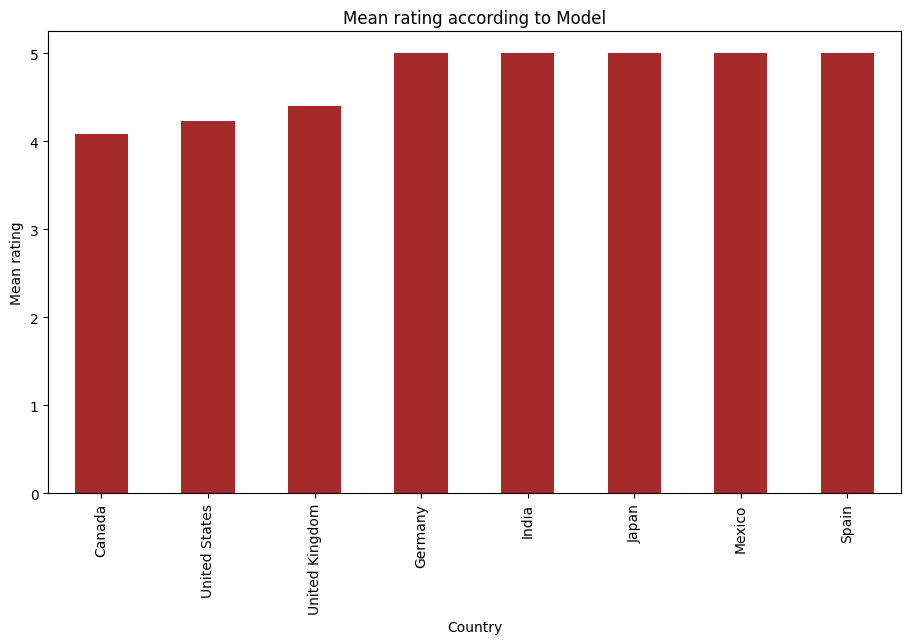

In [ ]:
i7.groupby('country')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Country')
plt.ylabel('Mean rating')
plt.show()

# Exploratory Data Analysis on Core i9 Gen-12,13 and 14

In [ ]:
i9.head()

country  ratingScore  \
0          India            5   
1          India            5   
2         France            5   
3  United States            5   
4          Japan            5   

                                   reviewDescription  \
0  I brought this processor for my gaming/worksta...   
1  Was using amd cpu untill now. Cpu died in 2 ye...   
2                                               Bien   
3  I recently got my hands on the Intel Core i9-1...   
4  I purchase this CPU 1 year ago and it cost me ...   

                                         reviewTitle        Model Core  
0                        This processor is a beast 🔥  i9 12th Gen   i9  
1                             Nothing can beat intel  i9 12th Gen   i9  
2                     Produit conforme à la demande.  i9 12th Gen   i9  
3  The processor also runs surprisingly cool, eve...  i9 12th Gen   i9  
4       all wat I needed for the next coming 5 years  i9 12th Gen   i9

In [ ]:
#Column Names
print(f"Feature names : {i9.columns.values}")

Feature names : ['country' 'ratingScore' 'reviewDescription' 'reviewTitle' 'Model' 'Core']


In [ ]:
#Checking for null values
i9.isnull().sum()

country              0
ratingScore          0
reviewDescription    0
reviewTitle          0
Model                0
Core                 0
dtype: int64

In [ ]:
#Datatypes of columns
i9.dtypes

country              object
ratingScore           int64
reviewDescription    object
reviewTitle          object
Model                object
Core                 object
dtype: object

In [ ]:
#Dataset shape
print(f"Dataset shape : {i9.shape}")

Dataset shape : (227, 6)


In [ ]:
#Number of reviews
len(i9)

227

## Analysing ratingScore Column

In [ ]:
#Number of reviews per star
print(f"Rating value count: \n{i9['ratingScore'].value_counts()}")

Rating value count: 
ratingScore
5    160
1     35
4     16
3     10
2      6
Name: count, dtype: int64


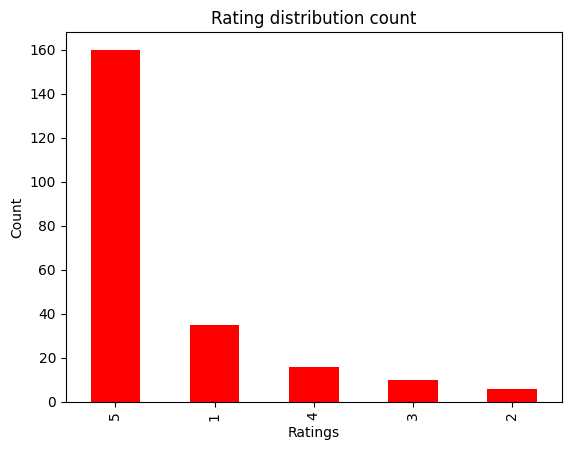

In [ ]:
#Bar plot to visualize the total counts of each rating

i9['ratingScore'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each rating
print(f"Rating value count - percentage distribution: \n{round(i9['ratingScore'].value_counts()/i9.shape[0]*100,2)}")

Rating value count - percentage distribution: 
ratingScore
5    70.48
1    15.42
4     7.05
3     4.41
2     2.64
Name: count, dtype: float64


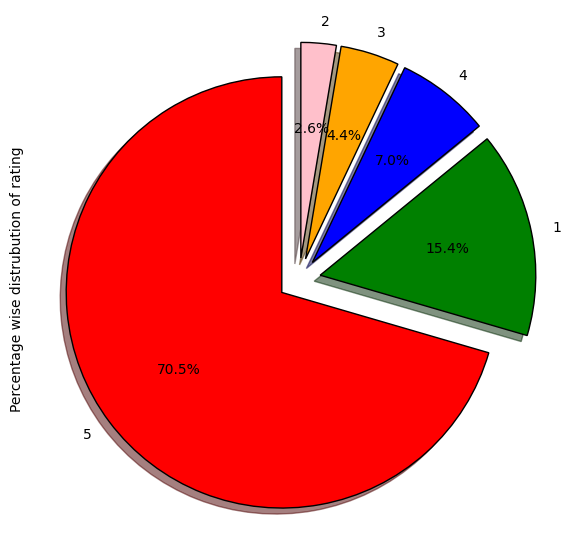

In [ ]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','pink')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i9['ratingScore'].value_counts()/i9.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

## Analysing Model Column

In [ ]:
#Distinct values of 'Model' and its count

print(f"Model value count: \n{i9['Model'].value_counts()}")

Model value count: 
Model
i9 12th Gen    104
i9 14th Gen     90
i9 13th Gen     33
Name: count, dtype: int64


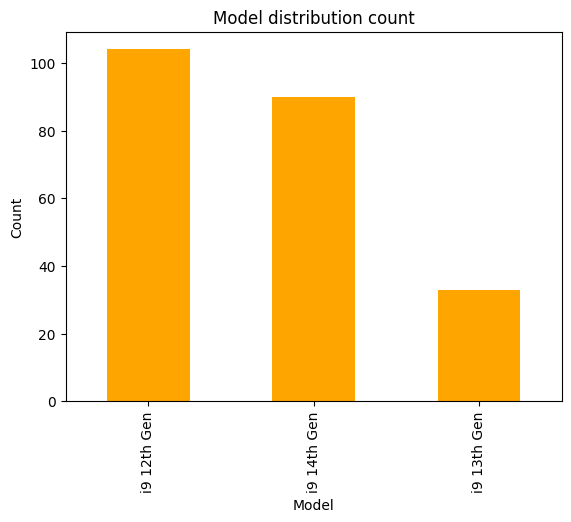

In [ ]:
#Bar graph to visualize the total counts of each Model

i9['Model'].value_counts().plot.bar(color = 'orange')
plt.title('Model distribution count')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each variation

print(f"Variation value count - percentage distribution: \n{round(i9['Model'].value_counts()/i9.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Model
i9 12th Gen    45.81
i9 14th Gen    39.65
i9 13th Gen    14.54
Name: count, dtype: float64


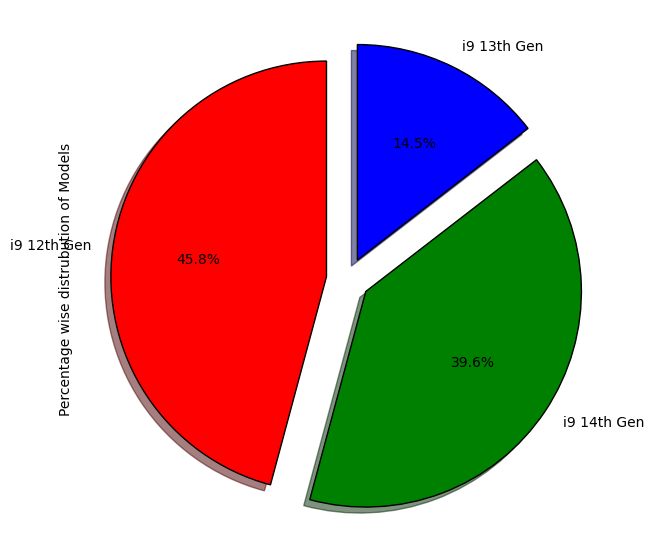

In [94]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i9['Model'].value_counts()/i9.shape[0]
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Models')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [95]:
#Mean rating of each model
i9.groupby('Model')['ratingScore'].mean()

Model
i9 12th Gen    4.278846
i9 13th Gen    4.303030
i9 14th Gen    3.933333
Name: ratingScore, dtype: float64

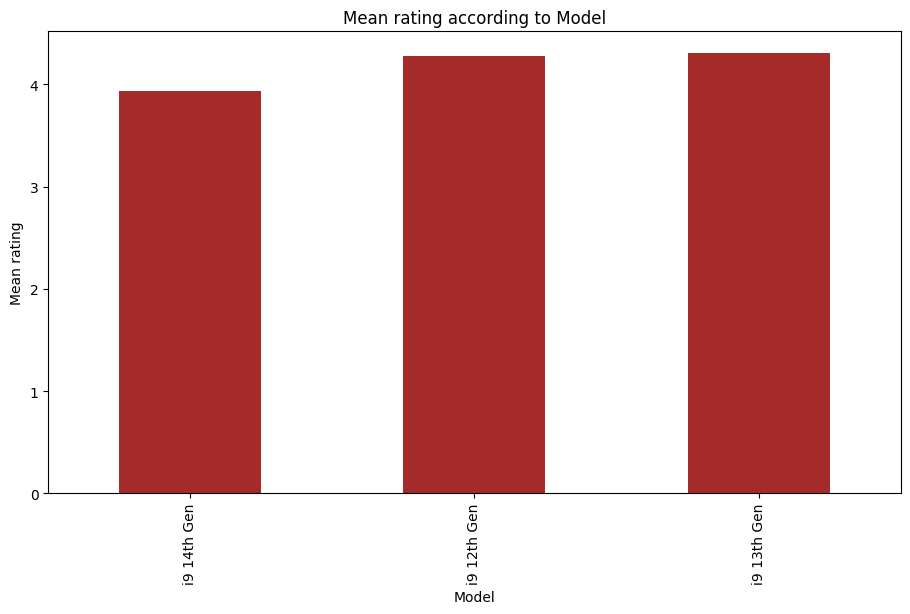

In [96]:
# Visualising rating distribution per model
i9.groupby('Model')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Model')
plt.ylabel('Mean rating')
plt.show()

## Analysing textDescription Column

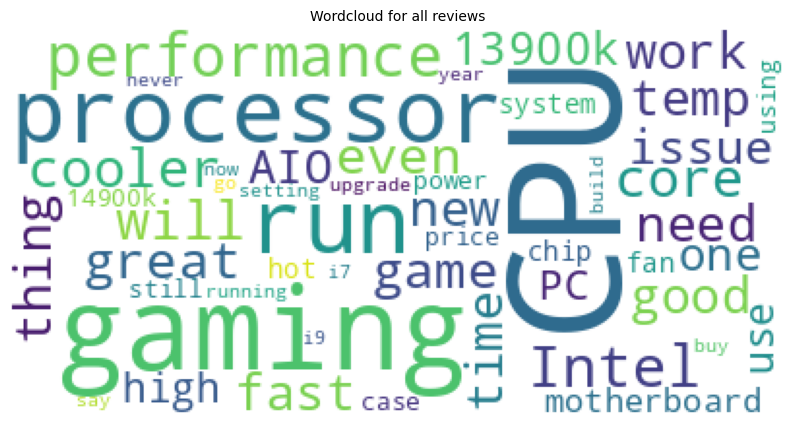

In [97]:
#Generating World Cloud Of Most Common Words used in reviews
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i9.reviewDescription)
reviews = " ".join([review for review in i9['reviewDescription']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing reviewTitle Column

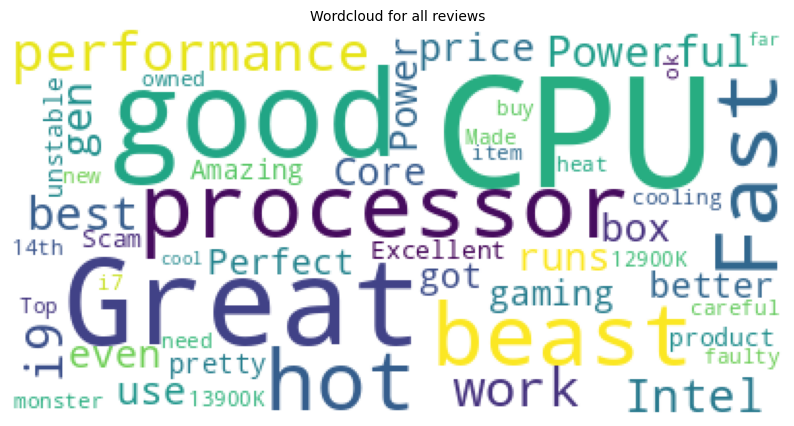

In [98]:
#Generating World Cloud Of Most Common Words used in reviews titles
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i9.reviewTitle)
reviews = " ".join([review for review in i9['reviewTitle']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing country Column

In [99]:
#Number of reviews per country
print(f"Rating value count: \n{i9['country'].value_counts()}")

Rating value count: 
country
United States     168
United Kingdom     19
Canada             14
Germany             9
India               6
Japan               3
Australia           2
Spain               2
France              1
Sweden              1
Netherlands         1
Italy               1
Name: count, dtype: int64


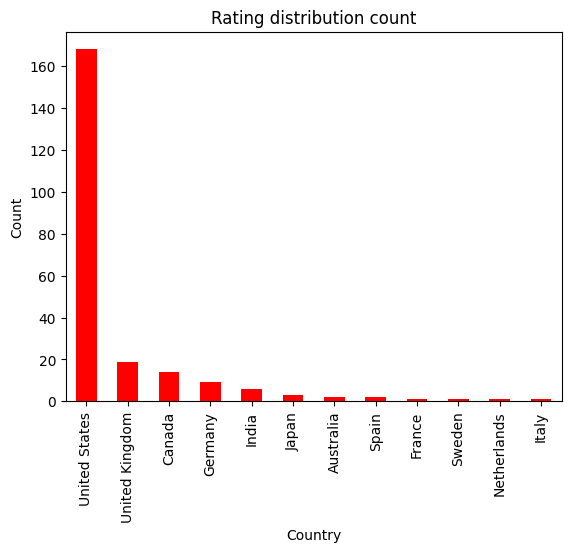

In [100]:
#Bar plot to visualize the total counts of rating per country

i9['country'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [101]:
#Finding the percentage distribution of each coutry

print(f"Variation value count - percentage distribution: \n{round(i9['country'].value_counts()/i9.shape[0]*100,2)}")

Variation value count - percentage distribution: 
country
United States     74.01
United Kingdom     8.37
Canada             6.17
Germany            3.96
India              2.64
Japan              1.32
Australia          0.88
Spain              0.88
France             0.44
Sweden             0.44
Netherlands        0.44
Italy              0.44
Name: count, dtype: float64


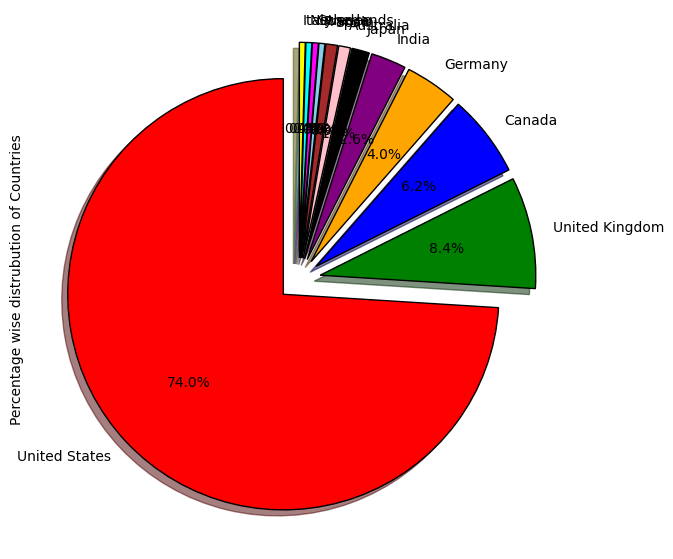

In [102]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','purple','black','pink','brown','skyblue','magenta','cyan','yellow')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i9['country'].value_counts()/i9.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Countries')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [103]:
#Mean rating by each country
i9.groupby('country')['ratingScore'].mean()

country
Australia         3.000000
Canada            4.214286
France            5.000000
Germany           4.000000
India             3.000000
Italy             5.000000
Japan             4.666667
Netherlands       5.000000
Spain             5.000000
Sweden            5.000000
United Kingdom    4.263158
United States     4.148810
Name: ratingScore, dtype: float64

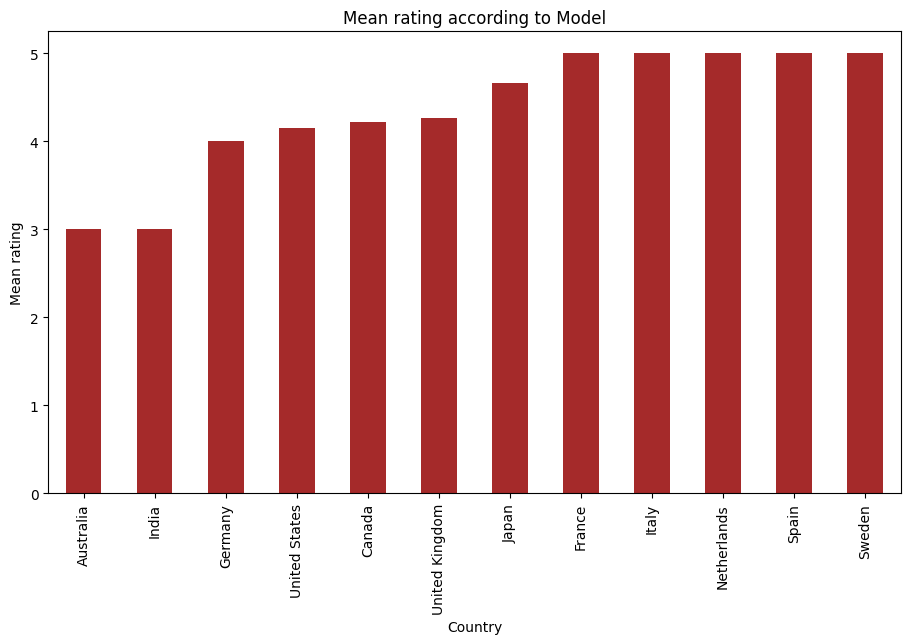

In [104]:
i9.groupby('country')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Country')
plt.ylabel('Mean rating')
plt.show()

# Explorating Data Analysis of all Intel Core Processors

In [105]:
all_core.head()

country  ratingScore                                  reviewDescription  \
0   India            1  Cpu stock cooler fan got broken with 1 blade i...   
1   India            1  The Processor is Good & Works Fine. But The De...   
2   India            4                                Performance is good   
3   India            5  If you would be building pc just for gaming an...   
4   India            5  This is one of the best cpu in budget if you o...   

                                         reviewTitle        Model Core  
0                                cpu with broken fan  i3 12th Gen   i3  
1                        Good Cpu but awful Delivery  i3 12th Gen   i3  
2                                               Good  i3 12th Gen   i3  
3  This is the best you'll get in this price rang...  i3 12th Gen   i3  
4                                            Awesome  i3 12th Gen   i3

In [106]:
#Column Names
print(f"Feature names : {all_core.columns.values}")

Feature names : ['country' 'ratingScore' 'reviewDescription' 'reviewTitle' 'Model' 'Core']


In [107]:
#Checking for null values
all_core.isnull().sum()

country              0
ratingScore          0
reviewDescription    0
reviewTitle          0
Model                0
Core                 0
dtype: int64

In [108]:
#Datatypes of columns
all_core.dtypes

country              object
ratingScore           int64
reviewDescription    object
reviewTitle          object
Model                object
Core                 object
dtype: object

In [109]:
#Dataset shape
print(f"Dataset shape : {all_core.shape}")

Dataset shape : (551, 6)


In [110]:
#Number of reviews
len(all_core)

551

## Analysing ratingScore Column

In [111]:
#Number of reviews per star
print(f"Rating value count: \n{all_core['ratingScore'].value_counts()}")

Rating value count: 
ratingScore
5    393
1     74
4     53
3     24
2      7
Name: count, dtype: int64


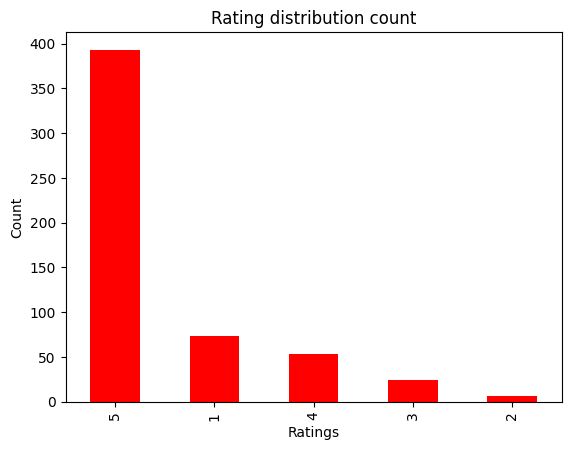

In [112]:
#Bar plot to visualize the total counts of each rating

all_core['ratingScore'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [113]:
#Finding the percentage distribution of each rating
print(f"Rating value count - percentage distribution: \n{round(all_core['ratingScore'].value_counts()/all_core.shape[0]*100,2)}")

Rating value count - percentage distribution: 
ratingScore
5    71.32
1    13.43
4     9.62
3     4.36
2     1.27
Name: count, dtype: float64


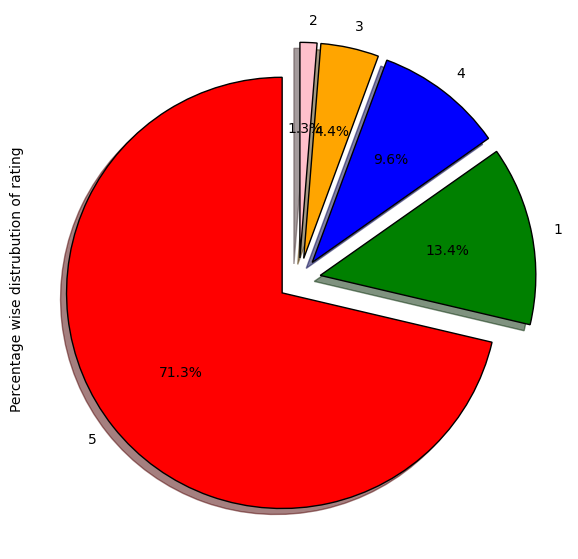

In [114]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','pink')
wp = {'linewidth':1, "edgecolor":'black'}
tags = all_core['ratingScore'].value_counts()/all_core.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

## Analysing Core Column

In [115]:
#Distinct values of 'Model' and its count

print(f"Model value count: \n{all_core['Core'].value_counts()}")

Model value count: 
Core
i9    227
i5    163
i7    136
i3     25
Name: count, dtype: int64


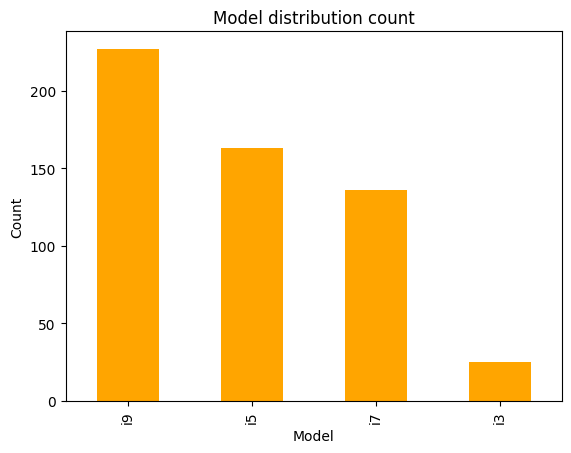

In [116]:
#Bar graph to visualize the total counts of each Model

all_core['Core'].value_counts().plot.bar(color = 'orange')
plt.title('Model distribution count')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [117]:
#Finding the percentage distribution of each variation

print(f"Variation value count - percentage distribution: \n{round(all_core['Core'].value_counts()/all_core.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Core
i9    41.20
i5    29.58
i7    24.68
i3     4.54
Name: count, dtype: float64


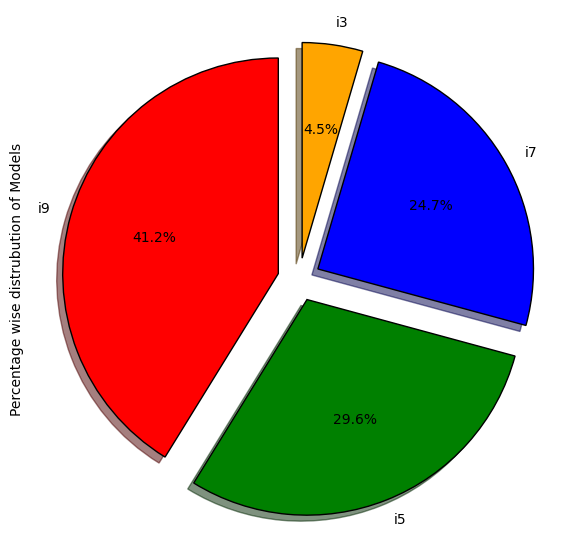

In [118]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange')
wp = {'linewidth':1, "edgecolor":'black'}
tags = all_core['Core'].value_counts()/all_core.shape[0]
explode=(0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Models')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [119]:
#Mean rating of each model
all_core.groupby('Core')['ratingScore'].mean()

Core
i3    4.480000
i5    4.312883
i7    4.272059
i9    4.145374
Name: ratingScore, dtype: float64

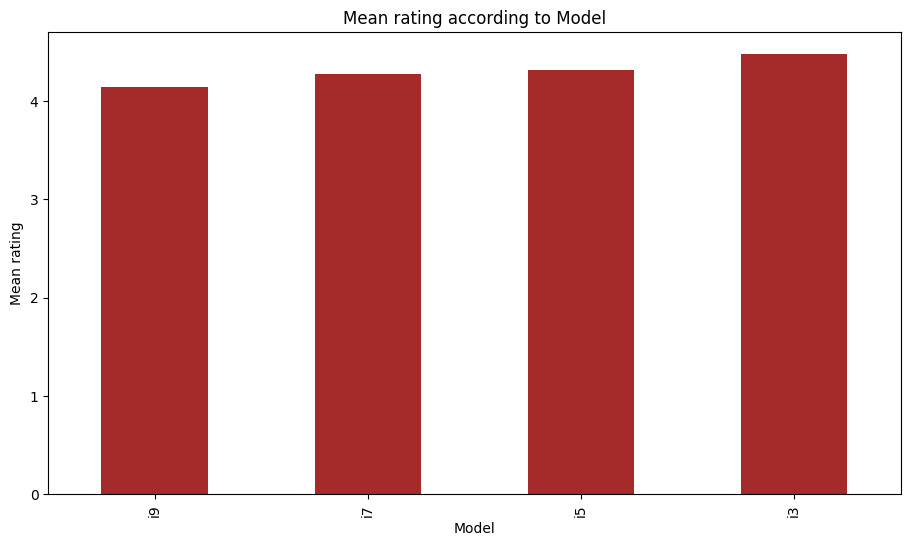

In [120]:
# Visualising rating distribution per model
all_core.groupby('Core')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Model')
plt.ylabel('Mean rating')
plt.show()

## Analysing reviewDescription Column

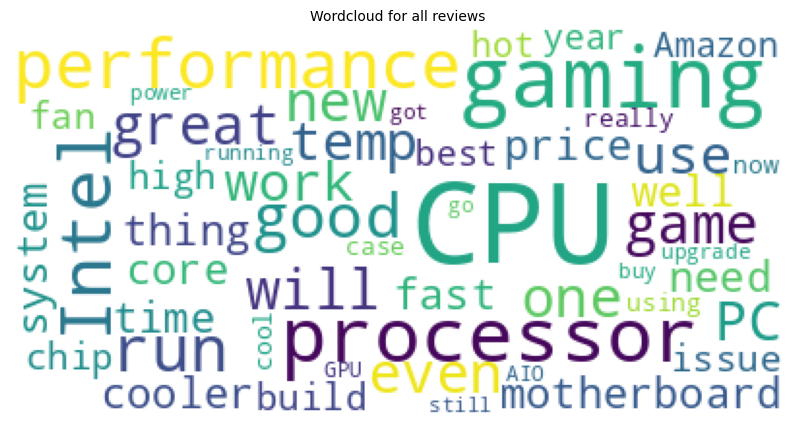

In [121]:
#Generating World Cloud Of Most Common Words used in reviews
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(all_core.reviewDescription)
reviews = " ".join([review for review in all_core['reviewDescription']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing reviewTitle Column

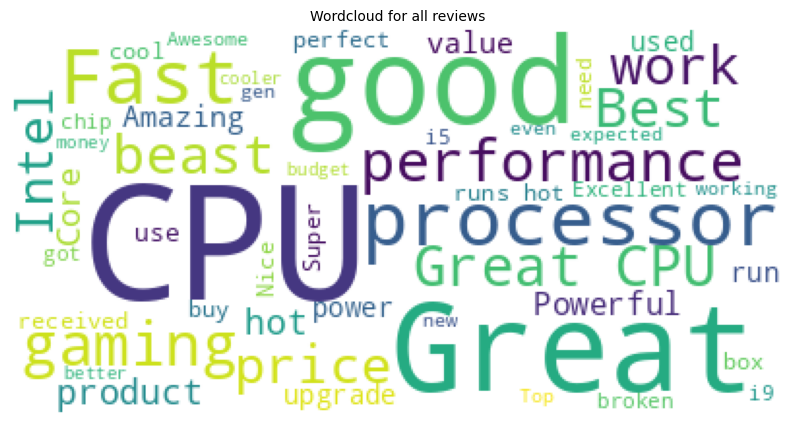

In [122]:
#Generating World Cloud Of Most Common Words used in reviews titles
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(all_core.reviewTitle)
reviews = " ".join([review for review in all_core['reviewTitle']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing country Column

In [123]:
#Number of reviews per country
print(f"Rating value count: \n{all_core['country'].value_counts()}")

Rating value count: 
country
United States     365
India              48
United Kingdom     46
Canada             39
Germany            17
Australia          11
Japan               5
France              4
Spain               4
Brazil              3
Italy               3
Sweden              2
Belgium             1
Singapore           1
Mexico              1
Netherlands         1
Name: count, dtype: int64


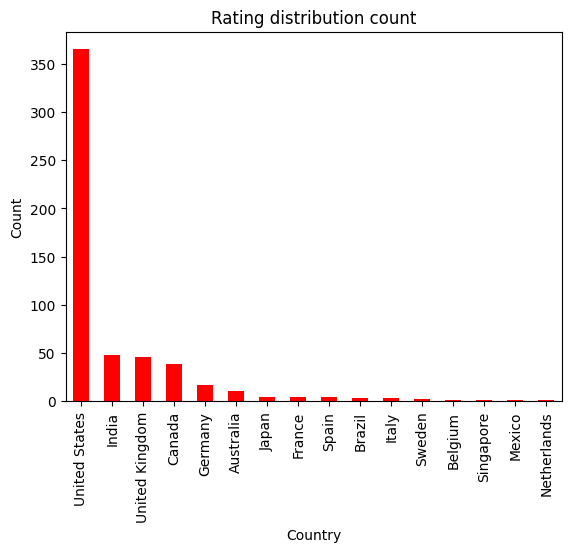

In [124]:
#Bar plot to visualize the total counts of rating per country

all_core['country'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [125]:
#Finding the percentage distribution of each coutry

print(f"Variation value count - percentage distribution: \n{round(all_core['country'].value_counts()/all_core.shape[0]*100,2)}")

Variation value count - percentage distribution: 
country
United States     66.24
India              8.71
United Kingdom     8.35
Canada             7.08
Germany            3.09
Australia          2.00
Japan              0.91
France             0.73
Spain              0.73
Brazil             0.54
Italy              0.54
Sweden             0.36
Belgium            0.18
Singapore          0.18
Mexico             0.18
Netherlands        0.18
Name: count, dtype: float64


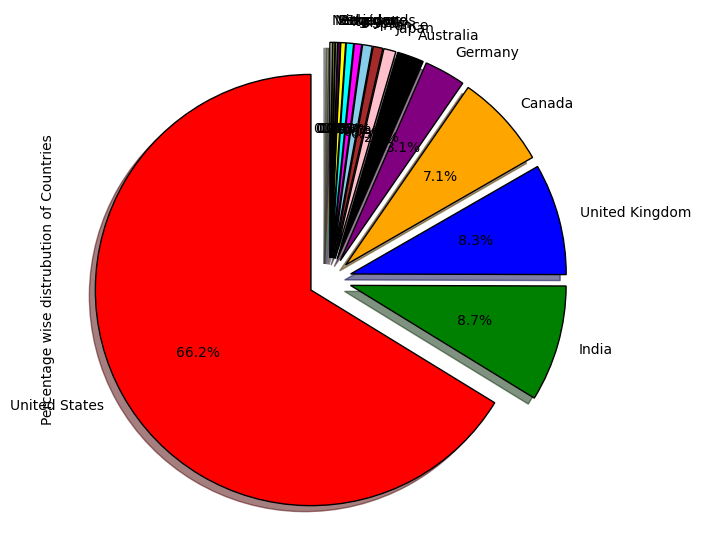

In [126]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','purple','black','pink','brown','skyblue','magenta','cyan','yellow','purple','gray','olive','azure')
wp = {'linewidth':1, "edgecolor":'black'}
tags = all_core['country'].value_counts()/all_core.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Countries')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [127]:
#Mean rating by each country
all_core.groupby('country')['ratingScore'].mean()

country
Australia         3.636364
Belgium           4.000000
Brazil            5.000000
Canada            4.256410
France            4.750000
Germany           4.352941
India             4.145833
Italy             3.666667
Japan             4.800000
Mexico            5.000000
Netherlands       5.000000
Singapore         5.000000
Spain             4.750000
Sweden            5.000000
United Kingdom    4.021739
United States     4.263014
Name: ratingScore, dtype: float64

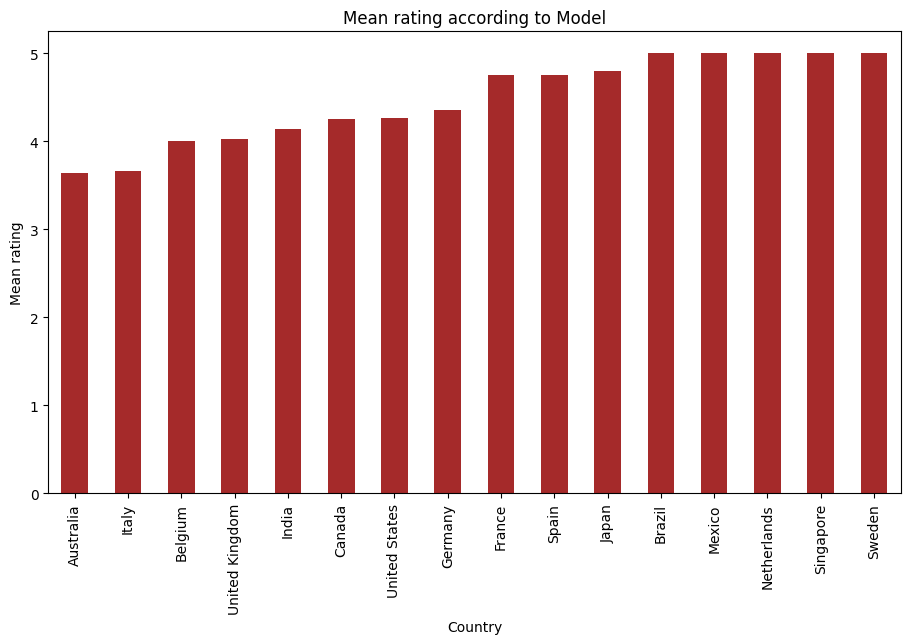

In [128]:
all_core.groupby('country')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Country')
plt.ylabel('Mean rating')
plt.show()

# Modeling

Above we have performed the Exploratory data analysis of available datasets. Going ahead we are going to use only one of the datasets, which is, all_core.

Going ahead for model training purposes, we are going to divide the dataset into three parts, Positive, Negetive and Nuetral/competitive.

In [129]:
ratingList=all_core['ratingScore'].tolist()
presumed_sentiment=[]
for i in range(0,len(all_core),1):
  if(ratingList[i]==5 or ratingList[i]==4):
    presumed_sentiment.append(2)
  elif(ratingList[i]==3):
    presumed_sentiment.append(1)
  elif(ratingList[i]==2 or ratingList[i]==1):
    presumed_sentiment.append(0)
all_core['Presumed_Sentiment']=presumed_sentiment

In [130]:
all_core.head()

country  ratingScore                                  reviewDescription  \
0   India            1  Cpu stock cooler fan got broken with 1 blade i...   
1   India            1  The Processor is Good & Works Fine. But The De...   
2   India            4                                Performance is good   
3   India            5  If you would be building pc just for gaming an...   
4   India            5  This is one of the best cpu in budget if you o...   

                                         reviewTitle        Model Core  \
0                                cpu with broken fan  i3 12th Gen   i3   
1                        Good Cpu but awful Delivery  i3 12th Gen   i3   
2                                               Good  i3 12th Gen   i3   
3  This is the best you'll get in this price rang...  i3 12th Gen   i3   
4                                            Awesome  i3 12th Gen   i3   

   Presumed_Sentiment  
0                   0  
1                   0  
2                   2  
3                   2  
4                   2

In [131]:
# In the code below,
# Replace any non alphabet characters with a space
# Covert to lower case and split into words
# Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus
corpus = []
stemmer = PorterStemmer()
for i in range(0, all_core.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', all_core.iloc[i]['reviewDescription'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [132]:
#Using Count Vectorizer to create bag of words
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = all_core['Presumed_Sentiment'].values

In [133]:
#Saving the Count Vectorizer
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

In [134]:
#Checking the shape of X and y
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (551, 2500)
y shape: (551,)


In [135]:
#Splitting data into train and test set with 30% data with testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (385, 2500)
y train: (385,)
X test: (166, 2500)
y test: (166,)


In [136]:
#We'll scale X_train and X_test so that all values are between 0 and 1.
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [137]:
#Saving the scaler model
pickle.dump(scaler, open('scaler.pkl', 'wb'))

## Random Forest

In [138]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [139]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8493975903614458


In [140]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [141]:
y_preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [142]:
#Saving the Random Forest classifier
pickle.dump(model_rf, open('model_rf.pkl', 'wb'))

## XG Boost

In [143]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [144]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9948051948051948
Testing Accuracy : 0.8433734939759037


In [145]:
y_preds = model_xgb.predict(X_test)

In [146]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('model_xgb.pkl', 'wb'))

## Decision Tree Classifier

In [147]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [148]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.7831325301204819


In [149]:
y_preds = model_dt.predict(X_test)

In [150]:
#Saving the XGBoost classifier
pickle.dump(model_dt, open('model_dt.pkl', 'wb'))

## VADER

In [151]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [152]:
sia = SentimentIntensityAnalyzer()

In [153]:
sia.polarity_scores("I am happy")

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [154]:
review_list=all_core['reviewDescription'].tolist()
sentiment_list=all_core['Presumed_Sentiment'].tolist()
predictions=[]
for i in range(0,len(review_list),1):
  compound=sia.polarity_scores(review_list[i])['compound']
  if(compound>=0.05):
    predictions.append(2)
  elif(compound<0.05 and compound>-0.05):
    predictions.append(1)
  elif(compound<=-0.05):
    predictions.append(0)
matches=0
for i in range(len(predictions)):
  if(sentiment_list[i]==predictions[i]):
    matches=matches+1

print(f'Accuracy is {matches/len(predictions)}')

Accuracy is 0.7513611615245009


## RoBERTa

In [155]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [156]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [157]:
review_list=all_core['reviewDescription'].tolist()
sentiment_list=all_core['Presumed_Sentiment'].tolist()
predictions_rb=[]
for i in range(len(review_list)):
  try:
    encoding=tokenizer(review_list[i],return_tensors='pt')
    output = model(**encoding)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
      'neg' : scores[0],
      'neu' : scores[1],
      'pos' : scores[2]
    }
    if(scores_dict['neg']>scores_dict['neu'] and scores_dict['neg']>scores_dict['pos']):
      predictions_rb.append(0)
    elif(scores_dict['pos']>scores_dict['neg'] and scores_dict['pos']>scores_dict['neu']):
      predictions_rb.append(2)
    else:
      predictions_rb.append(1)
  except RuntimeError:
    print(f'Broke for row {i}')
    predictions_rb.append(predictions[i])
matches=0
for i in range(len(predictions_rb)):
  if(sentiment_list[i]==predictions_rb[i]):
      matches=matches+1
print(f'Accuracy is {matches/len(predictions_rb)}')


Broke for row 94
Broke for row 288
Broke for row 299
Broke for row 300
Broke for row 471
Broke for row 495
Broke for row 497
Broke for row 515
Accuracy is 0.7404718693284936
